# MuseGAN 훈련

## 라이브러리 임포트

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import types

from models.MuseGAN import MuseGAN
from utils.loaders import load_music


from music21 import midi
from music21 import note, stream, duration



Using TensorFlow backend.


In [2]:
# run params
SECTION = 'compose'
RUN_ID = '0017'
DATA_NAME = 'chorales'
FILENAME = 'Jsb16thSeparated.npz'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])



if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))
    os.mkdir(os.path.join(RUN_FOLDER, 'samples'))

mode =  'build' # ' 'load' # 

## 데이터 적재

In [3]:
BATCH_SIZE = 64
n_bars = 2
n_steps_per_bar = 16
n_pitches = 84
n_tracks = 4

data_binary, data_ints, raw_data = load_music(DATA_NAME, FILENAME, n_bars, n_steps_per_bar)
data_binary = np.squeeze(data_binary)

## 모델 만들기

In [4]:
gan = MuseGAN(input_dim = data_binary.shape[1:]
        , critic_learning_rate = 0.001
        , generator_learning_rate = 0.001
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 32
        , batch_size = BATCH_SIZE
        , n_tracks = n_tracks
        , n_bars = n_bars
        , n_steps_per_bar = n_steps_per_bar
        , n_pitches = n_pitches
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:                 
    gan.load_weights(RUN_FOLDER)

W0923 22:02:32.397255 139949196228416 deprecation_wrapper.py:119] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 22:02:32.406772 139949196228416 deprecation_wrapper.py:119] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0923 22:02:32.407555 139949196228416 deprecation_wrapper.py:119] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0923 22:02:32.532086 139949196228416 deprecation_wrapper.py:119] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. 

In [5]:
gan.chords_tempNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
temporal_input (InputLayer)  (None, 32)                0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 2, 1, 1024)        66560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 1, 1024)        4096      
_________________________________________________________________
activation_1 (Activation)    (None, 2, 1, 1024)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 2, 1, 32)          32800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 1, 32)          128       
__________

In [6]:
gan.barGen[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bar_generator_input (InputLa (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              132096    
_________________________________________________________________
batch_normalization_11 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_11 (Activation)   (None, 1024)              0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 2, 1, 512)         0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 4, 1, 512)         524800    
_________________________________________________________________
batch_normalization_12 (Batc (None, 4, 1, 512)         2048      
__________

In [7]:
gan.generator.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
melody_input (InputLayer)       (None, 4, 32)        0                                            
__________________________________________________________________________________________________
chords_input (InputLayer)       (None, 32)           0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_3 (

In [8]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 2, 16, 84, 4)      0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 16, 84, 128)    1152      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 16, 84, 128)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 1, 16, 84, 128)    16512     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 16, 84, 128)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 16, 7, 128)     196736    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 16, 7, 128)     0         
__________

## 모델 훈련

In [9]:

EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 10

gan.epoch = 0

In [10]:
gan.train(     
    data_binary
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
W0923 22:02:45.550094 139949196228416 deprecation.py:323] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collecte

0 (5, 1) [D loss: (9.2)(R -0.7, F -0.0, G 1.0)] [G loss: -0.2]


/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 (5, 1) [D loss: (-208.8)(R -317.6, F 62.7, G 4.6)] [G loss: -34.4]
2 (5, 1) [D loss: (-133.1)(R -210.5, F 68.3, G 0.9)] [G loss: -92.8]
3 (5, 1) [D loss: (-157.2)(R -452.6, F 195.5, G 10.0)] [G loss: -179.3]
4 (5, 1) [D loss: (-107.4)(R -358.4, F 196.9, G 5.4)] [G loss: -196.5]
5 (5, 1) [D loss: (-61.3)(R -240.6, F 157.9, G 2.1)] [G loss: -158.3]
6 (5, 1) [D loss: (-29.7)(R -119.1, F 83.4, G 0.6)] [G loss: -72.8]
7 (5, 1) [D loss: (-3.4)(R 3.8, F -9.1, G 0.2)] [G loss: 10.0]
8 (5, 1) [D loss: (-1.7)(R -60.2, F 58.5, G 0.0)] [G loss: -54.7]
9 (5, 1) [D loss: (-0.5)(R -5.9, F 5.4, G 0.0)] [G loss: 29.3]
10 (5, 1) [D loss: (-14.4)(R 152.7, F -167.1, G 0.0)] [G loss: 220.9]
11 (5, 1) [D loss: (-14.5)(R 247.7, F -266.4, G 0.4)] [G loss: 249.4]
12 (5, 1) [D loss: (1.4)(R 85.6, F -86.0, G 0.2)] [G loss: 127.3]
13 (5, 1) [D loss: (1.3)(R 80.2, F -79.6, G 0.1)] [G loss: 96.8]
14 (5, 1) [D loss: (-2.8)(R 28.5, F -31.4, G 0.0)] [G loss: 26.8]
15 (5, 1) [D loss: (-7.1)(R -281.7, F 196.6, G 7.8)]

119 (5, 1) [D loss: (-24.5)(R 36.8, F -68.1, G 0.7)] [G loss: 73.6]
120 (5, 1) [D loss: (-21.7)(R 103.7, F -127.7, G 0.2)] [G loss: 147.8]
121 (5, 1) [D loss: (-22.4)(R 77.1, F -103.8, G 0.4)] [G loss: 134.6]
122 (5, 1) [D loss: (-23.6)(R 298.9, F -333.4, G 1.1)] [G loss: 316.8]
123 (5, 1) [D loss: (-21.9)(R 85.5, F -109.0, G 0.2)] [G loss: 181.7]
124 (5, 1) [D loss: (-23.3)(R 206.0, F -235.9, G 0.7)] [G loss: 216.6]
125 (5, 1) [D loss: (-21.7)(R 130.8, F -156.9, G 0.4)] [G loss: 146.5]
126 (5, 1) [D loss: (-22.3)(R 240.0, F -268.2, G 0.6)] [G loss: 261.5]
127 (5, 1) [D loss: (-22.3)(R 64.7, F -93.4, G 0.6)] [G loss: 115.7]
128 (5, 1) [D loss: (-22.4)(R 219.9, F -251.9, G 1.0)] [G loss: 245.1]
129 (5, 1) [D loss: (-21.4)(R 208.3, F -232.4, G 0.3)] [G loss: 470.7]
130 (5, 1) [D loss: (-24.4)(R 81.5, F -117.3, G 1.1)] [G loss: 98.9]
131 (5, 1) [D loss: (-22.9)(R 193.0, F -227.6, G 1.2)] [G loss: 141.2]
132 (5, 1) [D loss: (-20.2)(R 75.8, F -97.7, G 0.2)] [G loss: 188.6]
133 (5, 1) [D los

237 (5, 1) [D loss: (-20.4)(R -15.4, F -15.2, G 1.0)] [G loss: 20.8]
238 (5, 1) [D loss: (-20.6)(R 62.5, F -87.6, G 0.5)] [G loss: 116.7]
239 (5, 1) [D loss: (-20.9)(R 100.6, F -125.1, G 0.4)] [G loss: 145.0]
240 (5, 1) [D loss: (-20.6)(R 111.4, F -144.7, G 1.3)] [G loss: 75.5]
241 (5, 1) [D loss: (-19.9)(R 161.4, F -196.1, G 1.5)] [G loss: 16.3]
242 (5, 1) [D loss: (-19.3)(R 164.4, F -189.4, G 0.6)] [G loss: 77.1]
243 (5, 1) [D loss: (-21.1)(R 107.9, F -140.7, G 1.2)] [G loss: 63.5]
244 (5, 1) [D loss: (-21.5)(R 35.2, F -61.0, G 0.4)] [G loss: 101.9]
245 (5, 1) [D loss: (-19.2)(R 52.9, F -73.6, G 0.1)] [G loss: 152.1]
246 (5, 1) [D loss: (-21.0)(R -23.7, F -2.4, G 0.5)] [G loss: 44.5]
247 (5, 1) [D loss: (-20.3)(R -28.6, F -2.7, G 1.1)] [G loss: 48.2]
248 (5, 1) [D loss: (-20.7)(R 15.7, F -40.6, G 0.4)] [G loss: 34.1]
249 (5, 1) [D loss: (-20.8)(R -24.5, F 1.2, G 0.2)] [G loss: -5.7]
250 (5, 1) [D loss: (-21.4)(R 125.3, F -151.1, G 0.4)] [G loss: 109.9]
251 (5, 1) [D loss: (-22.1)(R 5

358 (5, 1) [D loss: (-19.9)(R 31.6, F -52.9, G 0.1)] [G loss: 50.0]
359 (5, 1) [D loss: (-20.8)(R 25.9, F -49.3, G 0.3)] [G loss: 46.4]
360 (5, 1) [D loss: (-21.8)(R -10.9, F -14.6, G 0.4)] [G loss: 24.8]
361 (5, 1) [D loss: (-20.5)(R 8.0, F -31.7, G 0.3)] [G loss: 38.0]
362 (5, 1) [D loss: (-21.7)(R -3.0, F -27.4, G 0.9)] [G loss: 25.7]
363 (5, 1) [D loss: (-20.2)(R 18.1, F -40.1, G 0.2)] [G loss: 14.6]
364 (5, 1) [D loss: (-21.4)(R 5.6, F -31.6, G 0.5)] [G loss: 57.8]
365 (5, 1) [D loss: (-21.5)(R 2.0, F -33.7, G 1.0)] [G loss: 47.5]
366 (5, 1) [D loss: (-21.2)(R 4.1, F -37.0, G 1.2)] [G loss: 25.0]
367 (5, 1) [D loss: (-21.5)(R 8.8, F -38.2, G 0.8)] [G loss: 36.6]
368 (5, 1) [D loss: (-20.7)(R 15.7, F -51.1, G 1.5)] [G loss: 15.5]
369 (5, 1) [D loss: (-21.8)(R 24.7, F -49.9, G 0.3)] [G loss: 55.8]
370 (5, 1) [D loss: (-23.1)(R -19.8, F -10.0, G 0.7)] [G loss: 12.4]
371 (5, 1) [D loss: (-21.7)(R 32.0, F -57.1, G 0.3)] [G loss: 52.8]
372 (5, 1) [D loss: (-22.5)(R 28.2, F -57.2, G 0.7)

479 (5, 1) [D loss: (-21.5)(R -25.6, F -3.3, G 0.7)] [G loss: 5.5]
480 (5, 1) [D loss: (-22.0)(R -28.6, F -2.7, G 0.9)] [G loss: -4.6]
481 (5, 1) [D loss: (-21.6)(R -21.5, F -3.7, G 0.4)] [G loss: -3.6]
482 (5, 1) [D loss: (-22.5)(R -41.6, F 13.3, G 0.6)] [G loss: -20.4]
483 (5, 1) [D loss: (-20.5)(R -18.3, F -4.6, G 0.2)] [G loss: 2.3]
484 (5, 1) [D loss: (-21.7)(R -11.5, F -19.9, G 1.0)] [G loss: 18.4]
485 (5, 1) [D loss: (-22.5)(R -64.2, F 34.0, G 0.8)] [G loss: -20.6]
486 (5, 1) [D loss: (-21.4)(R -49.8, F 23.0, G 0.5)] [G loss: -9.5]
487 (5, 1) [D loss: (-21.9)(R -24.7, F -4.2, G 0.7)] [G loss: -5.3]
488 (5, 1) [D loss: (-22.3)(R -8.0, F -21.7, G 0.7)] [G loss: 27.8]
489 (5, 1) [D loss: (-22.0)(R -45.2, F 13.9, G 0.9)] [G loss: -6.3]
490 (5, 1) [D loss: (-21.9)(R -24.3, F -2.0, G 0.4)] [G loss: 7.8]
491 (5, 1) [D loss: (-22.5)(R -25.4, F -1.5, G 0.4)] [G loss: 0.6]
492 (5, 1) [D loss: (-22.1)(R -27.6, F -2.8, G 0.8)] [G loss: 6.0]
493 (5, 1) [D loss: (-22.4)(R -42.1, F 10.3, G 0.9

600 (5, 1) [D loss: (-22.2)(R -26.0, F -1.8, G 0.6)] [G loss: 5.3]
601 (5, 1) [D loss: (-22.7)(R -41.4, F 11.4, G 0.7)] [G loss: -4.0]
602 (5, 1) [D loss: (-22.7)(R -59.8, F 31.8, G 0.5)] [G loss: -49.0]
603 (5, 1) [D loss: (-19.6)(R -15.8, F -5.0, G 0.1)] [G loss: -7.9]
604 (5, 1) [D loss: (-22.1)(R -23.7, F -2.5, G 0.4)] [G loss: -5.0]
605 (5, 1) [D loss: (-22.7)(R -59.2, F 30.5, G 0.6)] [G loss: -27.7]
606 (5, 1) [D loss: (-21.9)(R -65.3, F 40.5, G 0.3)] [G loss: -39.3]
607 (5, 1) [D loss: (-22.6)(R -56.5, F 26.4, G 0.8)] [G loss: -20.6]
608 (5, 1) [D loss: (-22.1)(R -0.3, F -28.8, G 0.7)] [G loss: 23.1]
609 (5, 1) [D loss: (-22.7)(R -3.0, F -28.4, G 0.9)] [G loss: 17.2]
610 (5, 1) [D loss: (-23.5)(R -89.1, F 55.0, G 1.1)] [G loss: -23.0]
611 (5, 1) [D loss: (-21.6)(R -55.7, F 28.2, G 0.6)] [G loss: -37.6]
612 (5, 1) [D loss: (-22.1)(R -24.9, F -0.4, G 0.3)] [G loss: -0.6]
613 (5, 1) [D loss: (-21.7)(R 3.7, F -32.5, G 0.7)] [G loss: 29.4]
614 (5, 1) [D loss: (-22.9)(R -51.3, F 20.9,

720 (5, 1) [D loss: (-22.4)(R -79.4, F 49.5, G 0.7)] [G loss: -55.1]
721 (5, 1) [D loss: (-22.3)(R -28.3, F 0.6, G 0.5)] [G loss: -3.7]
722 (5, 1) [D loss: (-22.1)(R -41.0, F 13.5, G 0.5)] [G loss: -15.0]
723 (5, 1) [D loss: (-23.3)(R -24.6, F -6.7, G 0.8)] [G loss: 2.1]
724 (5, 1) [D loss: (-23.6)(R -61.7, F 31.1, G 0.7)] [G loss: -29.1]
725 (5, 1) [D loss: (-23.0)(R -61.1, F 28.8, G 0.9)] [G loss: -14.3]
726 (5, 1) [D loss: (-22.9)(R -72.7, F 45.5, G 0.4)] [G loss: -36.5]
727 (5, 1) [D loss: (-22.4)(R -51.7, F 25.2, G 0.4)] [G loss: -17.6]
728 (5, 1) [D loss: (-22.7)(R -23.0, F -4.3, G 0.5)] [G loss: -8.2]
729 (5, 1) [D loss: (-23.0)(R -44.6, F 15.2, G 0.6)] [G loss: -17.2]
730 (5, 1) [D loss: (-22.2)(R -35.4, F 10.4, G 0.3)] [G loss: -19.4]
731 (5, 1) [D loss: (-23.3)(R -64.6, F 34.0, G 0.7)] [G loss: -32.5]
732 (5, 1) [D loss: (-23.7)(R -52.3, F 24.4, G 0.4)] [G loss: -29.5]
733 (5, 1) [D loss: (-23.1)(R -45.0, F 14.3, G 0.8)] [G loss: -7.6]
734 (5, 1) [D loss: (-22.9)(R -21.9, F -

840 (5, 1) [D loss: (-23.8)(R -34.5, F 5.0, G 0.6)] [G loss: -5.4]
841 (5, 1) [D loss: (-23.4)(R -48.0, F 18.3, G 0.6)] [G loss: -16.9]
842 (5, 1) [D loss: (-22.8)(R -43.8, F 18.1, G 0.3)] [G loss: -25.1]
843 (5, 1) [D loss: (-24.0)(R -21.6, F -8.1, G 0.6)] [G loss: 13.8]
844 (5, 1) [D loss: (-24.1)(R -62.3, F 30.3, G 0.8)] [G loss: -29.2]
845 (5, 1) [D loss: (-24.0)(R -52.5, F 22.1, G 0.6)] [G loss: -18.7]
846 (5, 1) [D loss: (-23.8)(R -47.3, F 19.6, G 0.4)] [G loss: -22.7]
847 (5, 1) [D loss: (-23.7)(R -49.7, F 19.3, G 0.7)] [G loss: -19.6]
848 (5, 1) [D loss: (-24.4)(R -38.4, F 7.2, G 0.7)] [G loss: -8.8]
849 (5, 1) [D loss: (-23.0)(R -25.6, F -6.3, G 0.9)] [G loss: -15.0]
850 (5, 1) [D loss: (-21.0)(R -48.3, F 9.5, G 1.8)] [G loss: -10.7]
851 (5, 1) [D loss: (-23.2)(R -45.2, F 16.7, G 0.5)] [G loss: -16.2]
852 (5, 1) [D loss: (-22.8)(R -62.0, F 34.2, G 0.5)] [G loss: -31.3]
853 (5, 1) [D loss: (-24.1)(R -30.4, F 1.3, G 0.5)] [G loss: -8.9]
854 (5, 1) [D loss: (-23.4)(R -42.1, F 12.

961 (5, 1) [D loss: (-23.6)(R -22.7, F -11.2, G 1.0)] [G loss: -5.7]
962 (5, 1) [D loss: (-23.5)(R -37.0, F 7.6, G 0.6)] [G loss: -9.7]
963 (5, 1) [D loss: (-24.2)(R -42.6, F 7.7, G 1.1)] [G loss: -11.3]
964 (5, 1) [D loss: (-22.9)(R -41.7, F 13.9, G 0.5)] [G loss: -7.9]
965 (5, 1) [D loss: (-23.6)(R -45.6, F 12.0, G 1.0)] [G loss: -14.4]
966 (5, 1) [D loss: (-22.7)(R -51.6, F 18.2, G 1.1)] [G loss: -22.2]
967 (5, 1) [D loss: (-23.9)(R -33.3, F 3.8, G 0.5)] [G loss: -17.7]
968 (5, 1) [D loss: (-23.5)(R -36.6, F 3.6, G 1.0)] [G loss: -7.4]
969 (5, 1) [D loss: (-24.8)(R -27.6, F -5.8, G 0.9)] [G loss: 8.3]
970 (5, 1) [D loss: (-23.1)(R -55.1, F 18.1, G 1.4)] [G loss: 3.8]
971 (5, 1) [D loss: (-22.8)(R -63.3, F 35.7, G 0.5)] [G loss: -33.2]
972 (5, 1) [D loss: (-22.2)(R -48.4, F 16.8, G 0.9)] [G loss: -11.6]
973 (5, 1) [D loss: (-23.7)(R -11.6, F -18.0, G 0.6)] [G loss: 11.4]
974 (5, 1) [D loss: (-24.4)(R -39.5, F 7.8, G 0.7)] [G loss: -7.1]
975 (5, 1) [D loss: (-24.9)(R -66.7, F 35.9, G 

1081 (5, 1) [D loss: (-25.2)(R -46.7, F 14.3, G 0.7)] [G loss: -15.0]
1082 (5, 1) [D loss: (-23.1)(R -23.7, F -1.8, G 0.2)] [G loss: -9.2]
1083 (5, 1) [D loss: (-24.3)(R -39.9, F 7.8, G 0.8)] [G loss: -0.5]
1084 (5, 1) [D loss: (-24.8)(R -47.7, F 12.4, G 1.1)] [G loss: -7.8]
1085 (5, 1) [D loss: (-25.6)(R -46.9, F 14.5, G 0.7)] [G loss: -18.9]
1086 (5, 1) [D loss: (-24.1)(R -41.1, F 7.6, G 0.9)] [G loss: -5.8]
1087 (5, 1) [D loss: (-24.6)(R -47.1, F 15.3, G 0.7)] [G loss: -12.3]
1088 (5, 1) [D loss: (-24.6)(R -45.3, F 12.2, G 0.8)] [G loss: -9.8]
1089 (5, 1) [D loss: (-24.2)(R -35.7, F 4.0, G 0.8)] [G loss: -3.7]
1090 (5, 1) [D loss: (-25.0)(R -37.5, F 5.7, G 0.7)] [G loss: -10.7]
1091 (5, 1) [D loss: (-21.8)(R -37.5, F -1.4, G 1.7)] [G loss: -14.9]
1092 (5, 1) [D loss: (-24.6)(R -35.1, F 5.0, G 0.6)] [G loss: -4.9]
1093 (5, 1) [D loss: (-24.0)(R -50.8, F 13.4, G 1.3)] [G loss: -7.3]
1094 (5, 1) [D loss: (-25.5)(R -36.4, F 5.4, G 0.6)] [G loss: -4.1]
1095 (5, 1) [D loss: (-25.3)(R -42.

1201 (5, 1) [D loss: (-25.2)(R -46.5, F 13.6, G 0.8)] [G loss: -10.1]
1202 (5, 1) [D loss: (-23.9)(R -35.0, F 6.8, G 0.4)] [G loss: -7.3]
1203 (5, 1) [D loss: (-25.0)(R -32.6, F -1.8, G 0.9)] [G loss: -1.3]
1204 (5, 1) [D loss: (-24.6)(R -37.5, F 5.3, G 0.8)] [G loss: -3.0]
1205 (5, 1) [D loss: (-24.9)(R -36.5, F 4.8, G 0.7)] [G loss: -2.4]
1206 (5, 1) [D loss: (-24.2)(R -33.3, F 3.4, G 0.6)] [G loss: -4.9]
1207 (5, 1) [D loss: (-24.6)(R -33.1, F -1.3, G 1.0)] [G loss: -0.6]
1208 (5, 1) [D loss: (-24.9)(R -36.6, F 4.8, G 0.7)] [G loss: -3.5]
1209 (5, 1) [D loss: (-24.7)(R -40.5, F 6.1, G 1.0)] [G loss: -3.8]
1210 (5, 1) [D loss: (-25.1)(R -36.6, F 3.8, G 0.8)] [G loss: -4.5]
1211 (5, 1) [D loss: (-26.0)(R -32.1, F 0.7, G 0.5)] [G loss: -0.8]
1212 (5, 1) [D loss: (-25.1)(R -38.6, F 4.1, G 0.9)] [G loss: 1.9]
1213 (5, 1) [D loss: (-25.2)(R -36.3, F 5.5, G 0.6)] [G loss: -3.2]
1214 (5, 1) [D loss: (-24.7)(R -31.9, F 2.2, G 0.5)] [G loss: 2.1]
1215 (5, 1) [D loss: (-25.6)(R -36.9, F 3.3, G

1322 (5, 1) [D loss: (-26.2)(R -39.9, F 6.0, G 0.8)] [G loss: -6.0]
1323 (5, 1) [D loss: (-24.6)(R -39.2, F 3.8, G 1.1)] [G loss: -3.6]
1324 (5, 1) [D loss: (-24.9)(R -26.6, F -3.0, G 0.5)] [G loss: -2.1]
1325 (5, 1) [D loss: (-25.9)(R -34.8, F 1.6, G 0.7)] [G loss: -3.1]
1326 (5, 1) [D loss: (-25.0)(R -34.3, F 0.5, G 0.9)] [G loss: -4.2]
1327 (5, 1) [D loss: (-26.1)(R -39.5, F 3.9, G 0.9)] [G loss: -1.2]
1328 (5, 1) [D loss: (-25.3)(R -39.5, F 2.3, G 1.2)] [G loss: -0.7]
1329 (5, 1) [D loss: (-25.6)(R -37.7, F 2.4, G 1.0)] [G loss: -0.6]
1330 (5, 1) [D loss: (-25.8)(R -36.2, F 4.2, G 0.6)] [G loss: -4.0]
1331 (5, 1) [D loss: (-25.2)(R -30.0, F 0.6, G 0.4)] [G loss: 1.1]
1332 (5, 1) [D loss: (-25.5)(R -48.1, F 12.4, G 1.0)] [G loss: -4.8]
1333 (5, 1) [D loss: (-27.2)(R -46.7, F 7.5, G 1.2)] [G loss: -2.0]
1334 (5, 1) [D loss: (-26.3)(R -43.4, F 8.8, G 0.8)] [G loss: -4.0]
1335 (5, 1) [D loss: (-26.1)(R -35.8, F 1.2, G 0.8)] [G loss: -3.2]
1336 (5, 1) [D loss: (-26.5)(R -36.5, F 3.2, G 

1443 (5, 1) [D loss: (-26.5)(R -43.3, F 3.5, G 1.3)] [G loss: -3.0]
1444 (5, 1) [D loss: (-25.9)(R -38.3, F 0.8, G 1.2)] [G loss: -1.5]
1445 (5, 1) [D loss: (-26.8)(R -35.4, F 2.4, G 0.6)] [G loss: -1.7]
1446 (5, 1) [D loss: (-26.1)(R -34.8, F 1.6, G 0.7)] [G loss: -3.0]
1447 (5, 1) [D loss: (-26.4)(R -38.1, F 2.4, G 0.9)] [G loss: -2.1]
1448 (5, 1) [D loss: (-26.1)(R -40.3, F 4.1, G 1.0)] [G loss: -1.8]
1449 (5, 1) [D loss: (-25.1)(R -39.8, F 1.2, G 1.4)] [G loss: -2.8]
1450 (5, 1) [D loss: (-24.7)(R -33.4, F 1.3, G 0.7)] [G loss: -0.8]
1451 (5, 1) [D loss: (-26.5)(R -38.3, F 2.0, G 1.0)] [G loss: -1.7]
1452 (5, 1) [D loss: (-25.7)(R -40.8, F 4.8, G 1.0)] [G loss: -3.0]
1453 (5, 1) [D loss: (-26.3)(R -37.0, F 1.5, G 0.9)] [G loss: -1.3]
1454 (5, 1) [D loss: (-26.6)(R -38.2, F 4.3, G 0.7)] [G loss: -1.9]
1455 (5, 1) [D loss: (-25.8)(R -33.3, F 1.7, G 0.6)] [G loss: -4.5]
1456 (5, 1) [D loss: (-25.2)(R -36.4, F 2.7, G 0.8)] [G loss: -1.4]
1457 (5, 1) [D loss: (-25.7)(R -38.0, F 0.8, G 1

1564 (5, 1) [D loss: (-26.5)(R -35.3, F 2.7, G 0.6)] [G loss: -4.4]
1565 (5, 1) [D loss: (-25.9)(R -36.5, F 2.0, G 0.9)] [G loss: -2.5]
1566 (5, 1) [D loss: (-26.0)(R -37.1, F 6.7, G 0.4)] [G loss: -8.2]
1567 (5, 1) [D loss: (-27.0)(R -40.3, F 3.4, G 1.0)] [G loss: -1.5]
1568 (5, 1) [D loss: (-26.7)(R -38.1, F 2.3, G 0.9)] [G loss: -3.9]
1569 (5, 1) [D loss: (-26.5)(R -38.6, F 4.2, G 0.8)] [G loss: -4.8]
1570 (5, 1) [D loss: (-27.7)(R -41.3, F 5.6, G 0.8)] [G loss: -5.0]
1571 (5, 1) [D loss: (-25.9)(R -26.7, F -3.6, G 0.4)] [G loss: -7.5]
1572 (5, 1) [D loss: (-25.4)(R -36.9, F -0.8, G 1.2)] [G loss: -0.3]
1573 (5, 1) [D loss: (-27.5)(R -38.2, F 3.9, G 0.7)] [G loss: -5.5]
1574 (5, 1) [D loss: (-26.3)(R -36.6, F 3.6, G 0.7)] [G loss: -3.0]
1575 (5, 1) [D loss: (-26.3)(R -40.4, F 4.4, G 1.0)] [G loss: -5.1]
1576 (5, 1) [D loss: (-26.5)(R -40.3, F 4.3, G 0.9)] [G loss: -2.2]
1577 (5, 1) [D loss: (-25.2)(R -41.0, F 4.8, G 1.1)] [G loss: -5.4]
1578 (5, 1) [D loss: (-26.5)(R -35.9, F 2.3, G

1685 (5, 1) [D loss: (-27.2)(R -41.0, F 2.3, G 1.1)] [G loss: -3.3]
1686 (5, 1) [D loss: (-27.3)(R -40.5, F 4.6, G 0.9)] [G loss: -4.2]
1687 (5, 1) [D loss: (-26.8)(R -41.4, F 5.0, G 1.0)] [G loss: -0.8]
1688 (5, 1) [D loss: (-27.5)(R -36.1, F 1.4, G 0.7)] [G loss: -3.9]
1689 (5, 1) [D loss: (-26.7)(R -36.9, F 1.4, G 0.9)] [G loss: -4.0]
1690 (5, 1) [D loss: (-26.8)(R -36.5, F 2.7, G 0.7)] [G loss: -5.3]
1691 (5, 1) [D loss: (-26.8)(R -35.1, F 1.1, G 0.7)] [G loss: -2.7]
1692 (5, 1) [D loss: (-27.3)(R -39.6, F 3.8, G 0.8)] [G loss: -4.0]
1693 (5, 1) [D loss: (-27.1)(R -41.1, F 5.6, G 0.8)] [G loss: -3.9]
1694 (5, 1) [D loss: (-26.8)(R -42.8, F 5.3, G 1.1)] [G loss: -3.3]
1695 (5, 1) [D loss: (-27.2)(R -40.2, F 4.4, G 0.9)] [G loss: -3.6]
1696 (5, 1) [D loss: (-26.6)(R -45.0, F 8.1, G 1.0)] [G loss: -5.9]
1697 (5, 1) [D loss: (-26.3)(R -33.6, F 1.8, G 0.6)] [G loss: -3.6]
1698 (5, 1) [D loss: (-26.3)(R -32.1, F 1.9, G 0.4)] [G loss: -2.9]
1699 (5, 1) [D loss: (-26.7)(R -34.5, F 2.2, G 0

1806 (5, 1) [D loss: (-27.5)(R -36.9, F 1.2, G 0.8)] [G loss: -2.0]
1807 (5, 1) [D loss: (-27.2)(R -39.0, F 4.0, G 0.8)] [G loss: -2.1]
1808 (5, 1) [D loss: (-26.4)(R -38.2, F 4.0, G 0.8)] [G loss: -3.3]
1809 (5, 1) [D loss: (-26.3)(R -38.9, F 2.7, G 1.0)] [G loss: -0.7]
1810 (5, 1) [D loss: (-26.0)(R -39.6, F 2.6, G 1.1)] [G loss: -2.0]
1811 (5, 1) [D loss: (-27.2)(R -38.0, F 3.6, G 0.7)] [G loss: -5.2]
1812 (5, 1) [D loss: (-26.4)(R -38.5, F 5.2, G 0.7)] [G loss: -4.4]
1813 (5, 1) [D loss: (-26.4)(R -37.3, F 1.9, G 0.9)] [G loss: -1.3]
1814 (5, 1) [D loss: (-26.3)(R -36.7, F 2.0, G 0.8)] [G loss: -1.2]
1815 (5, 1) [D loss: (-26.8)(R -40.1, F 5.2, G 0.8)] [G loss: -2.6]
1816 (5, 1) [D loss: (-26.3)(R -35.8, F 2.8, G 0.7)] [G loss: -2.7]
1817 (5, 1) [D loss: (-27.3)(R -39.3, F 3.1, G 0.9)] [G loss: -4.9]
1818 (5, 1) [D loss: (-26.2)(R -42.5, F 5.7, G 1.1)] [G loss: -3.6]
1819 (5, 1) [D loss: (-26.0)(R -37.7, F 4.7, G 0.7)] [G loss: -4.8]
1820 (5, 1) [D loss: (-26.3)(R -41.0, F 5.4, G 0

1927 (5, 1) [D loss: (-26.0)(R -39.1, F 2.3, G 1.1)] [G loss: -2.5]
1928 (5, 1) [D loss: (-26.5)(R -35.8, F 2.5, G 0.7)] [G loss: -3.4]
1929 (5, 1) [D loss: (-27.1)(R -40.6, F 2.5, G 1.1)] [G loss: -0.9]
1930 (5, 1) [D loss: (-26.8)(R -39.2, F 1.3, G 1.1)] [G loss: -4.2]
1931 (5, 1) [D loss: (-27.0)(R -39.4, F 2.9, G 0.9)] [G loss: -4.3]
1932 (5, 1) [D loss: (-27.0)(R -41.4, F 3.0, G 1.1)] [G loss: -1.8]
1933 (5, 1) [D loss: (-26.7)(R -35.2, F 1.6, G 0.7)] [G loss: -3.9]
1934 (5, 1) [D loss: (-25.7)(R -33.7, F 3.8, G 0.4)] [G loss: -4.6]
1935 (5, 1) [D loss: (-27.5)(R -42.8, F 3.2, G 1.2)] [G loss: -2.4]
1936 (5, 1) [D loss: (-26.2)(R -39.0, F 3.7, G 0.9)] [G loss: -2.1]
1937 (5, 1) [D loss: (-26.7)(R -37.6, F 3.8, G 0.7)] [G loss: -2.7]
1938 (5, 1) [D loss: (-26.7)(R -42.0, F 2.4, G 1.3)] [G loss: -4.1]
1939 (5, 1) [D loss: (-26.8)(R -42.1, F 5.6, G 1.0)] [G loss: -1.2]
1940 (5, 1) [D loss: (-27.2)(R -40.7, F 3.5, G 1.0)] [G loss: -1.9]
1941 (5, 1) [D loss: (-25.7)(R -35.6, F 3.9, G 0

2048 (5, 1) [D loss: (-26.7)(R -41.3, F 3.2, G 1.1)] [G loss: -0.7]
2049 (5, 1) [D loss: (-26.6)(R -41.1, F 4.9, G 1.0)] [G loss: -4.0]
2050 (5, 1) [D loss: (-27.5)(R -41.7, F 2.5, G 1.2)] [G loss: -4.3]
2051 (5, 1) [D loss: (-26.6)(R -40.7, F 3.5, G 1.1)] [G loss: -2.8]
2052 (5, 1) [D loss: (-26.9)(R -34.4, F 1.7, G 0.6)] [G loss: -3.1]
2053 (5, 1) [D loss: (-27.4)(R -39.7, F 3.0, G 0.9)] [G loss: -1.2]
2054 (5, 1) [D loss: (-27.3)(R -39.2, F 4.3, G 0.8)] [G loss: -5.3]
2055 (5, 1) [D loss: (-27.7)(R -32.6, F -0.6, G 0.6)] [G loss: -4.7]
2056 (5, 1) [D loss: (-27.8)(R -37.0, F 1.3, G 0.8)] [G loss: -1.6]
2057 (5, 1) [D loss: (-27.5)(R -40.6, F 4.6, G 0.8)] [G loss: -3.0]
2058 (5, 1) [D loss: (-26.6)(R -36.6, F 1.9, G 0.8)] [G loss: -1.9]
2059 (5, 1) [D loss: (-26.6)(R -39.8, F 4.6, G 0.8)] [G loss: -3.2]
2060 (5, 1) [D loss: (-27.7)(R -39.2, F 3.6, G 0.8)] [G loss: -3.2]
2061 (5, 1) [D loss: (-26.9)(R -37.1, F 2.9, G 0.7)] [G loss: -3.9]
2062 (5, 1) [D loss: (-26.7)(R -44.7, F 4.9, G 

2169 (5, 1) [D loss: (-26.5)(R -40.0, F 3.7, G 1.0)] [G loss: -5.8]
2170 (5, 1) [D loss: (-27.2)(R -37.2, F 3.1, G 0.7)] [G loss: -4.3]
2171 (5, 1) [D loss: (-27.9)(R -37.6, F 3.3, G 0.6)] [G loss: -3.8]
2172 (5, 1) [D loss: (-27.4)(R -40.4, F 3.1, G 1.0)] [G loss: -3.4]
2173 (5, 1) [D loss: (-26.3)(R -37.6, F 3.6, G 0.8)] [G loss: -3.2]
2174 (5, 1) [D loss: (-27.7)(R -38.5, F 1.9, G 0.9)] [G loss: -1.1]
2175 (5, 1) [D loss: (-27.9)(R -35.4, F 1.5, G 0.6)] [G loss: -3.8]
2176 (5, 1) [D loss: (-26.2)(R -42.4, F 3.3, G 1.3)] [G loss: -2.2]
2177 (5, 1) [D loss: (-27.3)(R -39.8, F 2.3, G 1.0)] [G loss: -2.6]
2178 (5, 1) [D loss: (-27.1)(R -41.7, F 2.5, G 1.2)] [G loss: -0.9]
2179 (5, 1) [D loss: (-27.7)(R -40.2, F 3.4, G 0.9)] [G loss: -4.7]
2180 (5, 1) [D loss: (-27.0)(R -41.8, F 2.8, G 1.2)] [G loss: -2.1]
2181 (5, 1) [D loss: (-28.2)(R -41.5, F 3.7, G 1.0)] [G loss: -3.5]
2182 (5, 1) [D loss: (-27.5)(R -41.1, F 3.2, G 1.0)] [G loss: -2.6]
2183 (5, 1) [D loss: (-27.7)(R -40.8, F 3.7, G 0

2290 (5, 1) [D loss: (-26.2)(R -42.0, F 3.2, G 1.3)] [G loss: -1.2]
2291 (5, 1) [D loss: (-27.6)(R -39.6, F 4.1, G 0.8)] [G loss: -2.9]
2292 (5, 1) [D loss: (-26.6)(R -36.7, F 0.7, G 0.9)] [G loss: -2.2]
2293 (5, 1) [D loss: (-26.2)(R -34.1, F 1.3, G 0.7)] [G loss: -2.8]
2294 (5, 1) [D loss: (-27.0)(R -40.6, F 3.9, G 1.0)] [G loss: -1.0]
2295 (5, 1) [D loss: (-27.0)(R -42.0, F 2.2, G 1.3)] [G loss: -5.4]
2296 (5, 1) [D loss: (-26.9)(R -37.5, F 1.9, G 0.9)] [G loss: -3.7]
2297 (5, 1) [D loss: (-27.6)(R -43.5, F 4.2, G 1.2)] [G loss: -3.2]
2298 (5, 1) [D loss: (-27.5)(R -40.3, F 3.5, G 0.9)] [G loss: -3.6]
2299 (5, 1) [D loss: (-27.3)(R -35.7, F 0.3, G 0.8)] [G loss: -5.5]
2300 (5, 1) [D loss: (-27.8)(R -45.3, F 6.0, G 1.1)] [G loss: -2.6]
2301 (5, 1) [D loss: (-27.6)(R -40.0, F 2.8, G 1.0)] [G loss: -2.9]
2302 (5, 1) [D loss: (-27.3)(R -40.5, F 1.3, G 1.2)] [G loss: -0.7]
2303 (5, 1) [D loss: (-28.0)(R -40.3, F 2.7, G 1.0)] [G loss: -2.7]
2304 (5, 1) [D loss: (-27.9)(R -39.2, F 5.1, G 0

2411 (5, 1) [D loss: (-26.8)(R -33.3, F 1.8, G 0.5)] [G loss: -3.4]
2412 (5, 1) [D loss: (-27.7)(R -43.3, F 4.8, G 1.1)] [G loss: -1.2]
2413 (5, 1) [D loss: (-26.9)(R -36.0, F 2.3, G 0.7)] [G loss: -4.9]
2414 (5, 1) [D loss: (-25.6)(R -40.2, F 0.6, G 1.4)] [G loss: 0.8]
2415 (5, 1) [D loss: (-27.4)(R -37.5, F 3.2, G 0.7)] [G loss: -4.6]
2416 (5, 1) [D loss: (-28.3)(R -40.9, F 2.4, G 1.0)] [G loss: -3.5]
2417 (5, 1) [D loss: (-27.6)(R -41.6, F 3.3, G 1.1)] [G loss: -4.9]
2418 (5, 1) [D loss: (-27.5)(R -40.4, F 3.9, G 0.9)] [G loss: -2.9]
2419 (5, 1) [D loss: (-26.8)(R -34.2, F 1.8, G 0.6)] [G loss: -4.5]
2420 (5, 1) [D loss: (-26.9)(R -39.0, F 4.1, G 0.8)] [G loss: -4.2]
2421 (5, 1) [D loss: (-27.3)(R -37.2, F 2.8, G 0.7)] [G loss: -3.9]
2422 (5, 1) [D loss: (-28.1)(R -42.0, F 4.3, G 1.0)] [G loss: -2.1]
2423 (5, 1) [D loss: (-27.4)(R -41.0, F 2.8, G 1.1)] [G loss: -3.9]
2424 (5, 1) [D loss: (-27.2)(R -34.1, F 1.5, G 0.5)] [G loss: -3.4]
2425 (5, 1) [D loss: (-27.3)(R -35.8, F 1.4, G 0.

2532 (5, 1) [D loss: (-27.6)(R -45.0, F 3.7, G 1.4)] [G loss: -2.6]
2533 (5, 1) [D loss: (-27.3)(R -37.0, F 2.5, G 0.7)] [G loss: -3.4]
2534 (5, 1) [D loss: (-27.4)(R -42.3, F 4.5, G 1.0)] [G loss: -2.3]
2535 (5, 1) [D loss: (-27.1)(R -41.9, F 4.7, G 1.0)] [G loss: -5.0]
2536 (5, 1) [D loss: (-28.3)(R -45.7, F 5.4, G 1.2)] [G loss: -4.6]
2537 (5, 1) [D loss: (-26.8)(R -33.1, F 0.4, G 0.6)] [G loss: -5.3]
2538 (5, 1) [D loss: (-26.7)(R -39.8, F 3.3, G 1.0)] [G loss: -2.0]
2539 (5, 1) [D loss: (-27.6)(R -39.0, F 3.0, G 0.8)] [G loss: -3.2]
2540 (5, 1) [D loss: (-28.5)(R -44.2, F 2.7, G 1.3)] [G loss: -3.0]
2541 (5, 1) [D loss: (-27.7)(R -36.8, F 2.6, G 0.6)] [G loss: -4.1]
2542 (5, 1) [D loss: (-28.1)(R -40.1, F 3.3, G 0.9)] [G loss: -5.7]
2543 (5, 1) [D loss: (-27.3)(R -40.5, F 3.8, G 0.9)] [G loss: -3.9]
2544 (5, 1) [D loss: (-27.9)(R -40.8, F 3.8, G 0.9)] [G loss: -1.9]
2545 (5, 1) [D loss: (-26.9)(R -32.8, F 0.4, G 0.6)] [G loss: -3.2]
2546 (5, 1) [D loss: (-28.7)(R -39.5, F 2.7, G 0

2653 (5, 1) [D loss: (-27.1)(R -38.7, F 4.5, G 0.7)] [G loss: -4.3]
2654 (5, 1) [D loss: (-27.7)(R -43.6, F 5.5, G 1.0)] [G loss: -4.8]
2655 (5, 1) [D loss: (-28.3)(R -37.4, F 1.6, G 0.7)] [G loss: -5.0]
2656 (5, 1) [D loss: (-28.4)(R -40.3, F 3.7, G 0.8)] [G loss: -6.1]
2657 (5, 1) [D loss: (-28.0)(R -36.5, F 2.2, G 0.6)] [G loss: -2.8]
2658 (5, 1) [D loss: (-28.1)(R -35.3, F 1.3, G 0.6)] [G loss: -4.8]
2659 (5, 1) [D loss: (-27.7)(R -39.5, F 2.8, G 0.9)] [G loss: -3.3]
2660 (5, 1) [D loss: (-27.2)(R -43.5, F 4.2, G 1.2)] [G loss: -2.6]
2661 (5, 1) [D loss: (-26.4)(R -40.7, F 5.0, G 0.9)] [G loss: -4.3]
2662 (5, 1) [D loss: (-27.0)(R -42.7, F 3.7, G 1.2)] [G loss: -3.3]
2663 (5, 1) [D loss: (-28.6)(R -44.6, F 5.2, G 1.1)] [G loss: -3.3]
2664 (5, 1) [D loss: (-27.0)(R -44.8, F 4.9, G 1.3)] [G loss: -1.8]
2665 (5, 1) [D loss: (-26.8)(R -39.2, F 4.2, G 0.8)] [G loss: -3.7]
2666 (5, 1) [D loss: (-26.7)(R -38.7, F 4.3, G 0.8)] [G loss: -3.4]
2667 (5, 1) [D loss: (-27.5)(R -45.2, F 6.6, G 1

2774 (5, 1) [D loss: (-27.4)(R -34.1, F 0.5, G 0.6)] [G loss: -2.7]
2775 (5, 1) [D loss: (-27.7)(R -36.3, F 1.1, G 0.7)] [G loss: -3.3]
2776 (5, 1) [D loss: (-27.6)(R -36.7, F 1.5, G 0.8)] [G loss: -1.6]
2777 (5, 1) [D loss: (-28.0)(R -42.3, F 4.9, G 0.9)] [G loss: -2.0]
2778 (5, 1) [D loss: (-28.2)(R -43.2, F 3.8, G 1.1)] [G loss: -3.9]
2779 (5, 1) [D loss: (-27.6)(R -48.9, F 6.5, G 1.5)] [G loss: -2.7]
2780 (5, 1) [D loss: (-26.7)(R -43.4, F 5.5, G 1.1)] [G loss: -2.3]
2781 (5, 1) [D loss: (-28.2)(R -44.2, F 5.5, G 1.1)] [G loss: -4.3]
2782 (5, 1) [D loss: (-27.2)(R -36.1, F 3.7, G 0.5)] [G loss: -4.5]
2783 (5, 1) [D loss: (-27.9)(R -40.7, F 2.6, G 1.0)] [G loss: -2.6]
2784 (5, 1) [D loss: (-27.9)(R -42.5, F 5.3, G 0.9)] [G loss: -5.4]
2785 (5, 1) [D loss: (-27.5)(R -38.2, F 3.1, G 0.8)] [G loss: -3.3]
2786 (5, 1) [D loss: (-27.6)(R -40.8, F 2.0, G 1.1)] [G loss: -3.7]
2787 (5, 1) [D loss: (-29.4)(R -43.1, F 2.4, G 1.1)] [G loss: -4.6]
2788 (5, 1) [D loss: (-27.8)(R -39.9, F 3.7, G 0

2895 (5, 1) [D loss: (-27.9)(R -41.2, F 3.0, G 1.0)] [G loss: -2.6]
2896 (5, 1) [D loss: (-27.2)(R -43.6, F 4.6, G 1.2)] [G loss: -2.9]
2897 (5, 1) [D loss: (-27.6)(R -45.7, F 6.2, G 1.2)] [G loss: -5.3]
2898 (5, 1) [D loss: (-25.6)(R -43.6, F 3.7, G 1.4)] [G loss: -3.9]
2899 (5, 1) [D loss: (-27.2)(R -38.4, F 2.9, G 0.8)] [G loss: -4.6]
2900 (5, 1) [D loss: (-27.8)(R -43.2, F 3.7, G 1.2)] [G loss: -3.1]
2901 (5, 1) [D loss: (-27.0)(R -36.3, F 2.0, G 0.7)] [G loss: -2.8]
2902 (5, 1) [D loss: (-28.1)(R -45.3, F 5.4, G 1.2)] [G loss: -3.0]
2903 (5, 1) [D loss: (-27.4)(R -40.2, F 3.1, G 1.0)] [G loss: -1.6]
2904 (5, 1) [D loss: (-26.9)(R -45.0, F 3.5, G 1.5)] [G loss: -2.3]
2905 (5, 1) [D loss: (-29.2)(R -38.1, F 2.1, G 0.7)] [G loss: -3.7]
2906 (5, 1) [D loss: (-28.3)(R -48.4, F 8.9, G 1.1)] [G loss: -5.5]
2907 (5, 1) [D loss: (-28.1)(R -38.2, F 4.0, G 0.6)] [G loss: -6.3]
2908 (5, 1) [D loss: (-28.3)(R -39.0, F 2.0, G 0.9)] [G loss: -4.7]
2909 (5, 1) [D loss: (-27.6)(R -42.0, F 4.4, G 1

3016 (5, 1) [D loss: (-27.2)(R -35.1, F 1.3, G 0.7)] [G loss: -2.2]
3017 (5, 1) [D loss: (-27.0)(R -38.1, F 2.4, G 0.9)] [G loss: -0.1]
3018 (5, 1) [D loss: (-27.5)(R -40.1, F 3.6, G 0.9)] [G loss: -4.2]
3019 (5, 1) [D loss: (-26.8)(R -35.9, F 2.8, G 0.6)] [G loss: -2.9]
3020 (5, 1) [D loss: (-28.7)(R -39.5, F 3.5, G 0.7)] [G loss: -4.3]
3021 (5, 1) [D loss: (-28.1)(R -43.9, F 3.9, G 1.2)] [G loss: -4.1]
3022 (5, 1) [D loss: (-26.8)(R -34.6, F 0.9, G 0.7)] [G loss: -3.2]
3023 (5, 1) [D loss: (-27.6)(R -39.5, F 4.2, G 0.8)] [G loss: -4.9]
3024 (5, 1) [D loss: (-27.7)(R -43.2, F 6.5, G 0.9)] [G loss: -5.1]
3025 (5, 1) [D loss: (-27.7)(R -38.7, F 3.2, G 0.8)] [G loss: -3.4]
3026 (5, 1) [D loss: (-27.7)(R -44.8, F 5.3, G 1.2)] [G loss: -3.9]
3027 (5, 1) [D loss: (-28.4)(R -38.1, F 1.5, G 0.8)] [G loss: -3.9]
3028 (5, 1) [D loss: (-28.1)(R -42.4, F 3.6, G 1.1)] [G loss: -2.5]
3029 (5, 1) [D loss: (-27.0)(R -42.8, F 3.8, G 1.2)] [G loss: -2.5]
3030 (5, 1) [D loss: (-27.7)(R -37.9, F 1.8, G 0

3137 (5, 1) [D loss: (-26.5)(R -40.5, F 1.4, G 1.3)] [G loss: -2.9]
3138 (5, 1) [D loss: (-27.9)(R -40.5, F 3.8, G 0.9)] [G loss: -4.3]
3139 (5, 1) [D loss: (-26.6)(R -42.1, F 4.3, G 1.1)] [G loss: -2.7]
3140 (5, 1) [D loss: (-27.9)(R -42.8, F 4.4, G 1.1)] [G loss: -3.8]
3141 (5, 1) [D loss: (-27.7)(R -38.6, F 3.4, G 0.7)] [G loss: -3.7]
3142 (5, 1) [D loss: (-27.3)(R -41.4, F 3.1, G 1.1)] [G loss: -1.0]
3143 (5, 1) [D loss: (-27.5)(R -44.4, F 4.2, G 1.3)] [G loss: -2.8]
3144 (5, 1) [D loss: (-28.3)(R -44.8, F 5.5, G 1.1)] [G loss: -4.0]
3145 (5, 1) [D loss: (-28.2)(R -38.3, F 3.2, G 0.7)] [G loss: -3.1]
3146 (5, 1) [D loss: (-28.1)(R -43.3, F 3.7, G 1.2)] [G loss: -4.1]
3147 (5, 1) [D loss: (-28.5)(R -43.3, F 4.4, G 1.0)] [G loss: -4.0]
3148 (5, 1) [D loss: (-27.5)(R -35.4, F 1.1, G 0.7)] [G loss: -4.7]
3149 (5, 1) [D loss: (-26.1)(R -40.9, F 2.7, G 1.2)] [G loss: 0.2]
3150 (5, 1) [D loss: (-27.6)(R -38.3, F 2.1, G 0.9)] [G loss: -3.6]
3151 (5, 1) [D loss: (-28.5)(R -44.0, F 6.3, G 0.

3258 (5, 1) [D loss: (-27.8)(R -44.0, F 5.8, G 1.0)] [G loss: -4.6]
3259 (5, 1) [D loss: (-27.3)(R -44.3, F 5.1, G 1.2)] [G loss: -2.2]
3260 (5, 1) [D loss: (-28.0)(R -44.7, F 2.8, G 1.4)] [G loss: -0.8]
3261 (5, 1) [D loss: (-27.4)(R -37.7, F 2.1, G 0.8)] [G loss: -2.5]
3262 (5, 1) [D loss: (-27.2)(R -39.2, F 2.4, G 1.0)] [G loss: -3.1]
3263 (5, 1) [D loss: (-26.9)(R -44.1, F 4.6, G 1.3)] [G loss: -0.6]
3264 (5, 1) [D loss: (-28.2)(R -43.5, F 4.6, G 1.1)] [G loss: -3.3]
3265 (5, 1) [D loss: (-28.1)(R -42.8, F 4.5, G 1.0)] [G loss: -3.8]
3266 (5, 1) [D loss: (-27.9)(R -37.9, F 1.8, G 0.8)] [G loss: -4.2]
3267 (5, 1) [D loss: (-26.9)(R -40.5, F 5.0, G 0.9)] [G loss: -4.5]
3268 (5, 1) [D loss: (-28.1)(R -43.2, F 4.9, G 1.0)] [G loss: -4.2]
3269 (5, 1) [D loss: (-26.5)(R -41.2, F 2.3, G 1.2)] [G loss: -2.0]
3270 (5, 1) [D loss: (-28.3)(R -42.2, F 3.9, G 1.0)] [G loss: -3.5]
3271 (5, 1) [D loss: (-27.5)(R -41.2, F 2.6, G 1.1)] [G loss: -2.3]
3272 (5, 1) [D loss: (-27.3)(R -42.9, F 4.5, G 1

3379 (5, 1) [D loss: (-28.3)(R -40.7, F 2.1, G 1.0)] [G loss: -2.1]
3380 (5, 1) [D loss: (-27.5)(R -38.4, F 3.3, G 0.8)] [G loss: -2.3]
3381 (5, 1) [D loss: (-27.7)(R -36.9, F 2.9, G 0.6)] [G loss: -4.0]
3382 (5, 1) [D loss: (-28.1)(R -38.8, F 1.3, G 0.9)] [G loss: -2.4]
3383 (5, 1) [D loss: (-26.5)(R -39.8, F 1.5, G 1.2)] [G loss: -2.1]
3384 (5, 1) [D loss: (-27.9)(R -35.6, F 1.2, G 0.7)] [G loss: -4.9]
3385 (5, 1) [D loss: (-28.7)(R -41.3, F 3.4, G 0.9)] [G loss: -2.0]
3386 (5, 1) [D loss: (-27.4)(R -46.3, F 5.7, G 1.3)] [G loss: -4.5]
3387 (5, 1) [D loss: (-27.8)(R -41.5, F 4.6, G 0.9)] [G loss: -4.2]
3388 (5, 1) [D loss: (-28.3)(R -39.4, F 1.9, G 0.9)] [G loss: -4.0]
3389 (5, 1) [D loss: (-28.1)(R -37.8, F 2.6, G 0.7)] [G loss: -2.6]
3390 (5, 1) [D loss: (-28.9)(R -40.5, F 1.7, G 1.0)] [G loss: -3.6]
3391 (5, 1) [D loss: (-27.7)(R -38.0, F 2.6, G 0.8)] [G loss: -1.0]
3392 (5, 1) [D loss: (-28.0)(R -46.8, F 6.5, G 1.2)] [G loss: -5.7]
3393 (5, 1) [D loss: (-27.6)(R -41.7, F 3.9, G 1

3500 (5, 1) [D loss: (-27.3)(R -44.6, F 4.7, G 1.3)] [G loss: -4.1]
3501 (5, 1) [D loss: (-28.0)(R -44.3, F 4.1, G 1.2)] [G loss: -3.8]
3502 (5, 1) [D loss: (-29.4)(R -43.9, F 5.0, G 1.0)] [G loss: -7.3]
3503 (5, 1) [D loss: (-27.8)(R -40.7, F 1.8, G 1.1)] [G loss: 0.1]
3504 (5, 1) [D loss: (-28.7)(R -41.4, F 3.0, G 1.0)] [G loss: -1.4]
3505 (5, 1) [D loss: (-28.5)(R -35.8, F 0.7, G 0.7)] [G loss: -4.5]
3506 (5, 1) [D loss: (-28.6)(R -45.0, F 3.6, G 1.3)] [G loss: -2.9]
3507 (5, 1) [D loss: (-28.5)(R -43.9, F 4.6, G 1.1)] [G loss: -3.5]
3508 (5, 1) [D loss: (-28.0)(R -37.6, F 2.5, G 0.7)] [G loss: -3.1]
3509 (5, 1) [D loss: (-28.5)(R -44.6, F 4.1, G 1.2)] [G loss: -3.7]
3510 (5, 1) [D loss: (-27.1)(R -34.8, F 1.5, G 0.6)] [G loss: -0.6]
3511 (5, 1) [D loss: (-27.9)(R -44.0, F 5.9, G 1.0)] [G loss: -1.0]
3512 (5, 1) [D loss: (-27.3)(R -45.9, F 5.6, G 1.3)] [G loss: -2.2]
3513 (5, 1) [D loss: (-28.5)(R -42.5, F 4.4, G 0.9)] [G loss: -4.0]
3514 (5, 1) [D loss: (-27.8)(R -39.6, F 3.9, G 0.

3621 (5, 1) [D loss: (-28.7)(R -40.7, F 2.9, G 0.9)] [G loss: -5.6]
3622 (5, 1) [D loss: (-28.2)(R -45.9, F 5.1, G 1.3)] [G loss: -2.7]
3623 (5, 1) [D loss: (-28.0)(R -40.2, F 2.9, G 0.9)] [G loss: -1.4]
3624 (5, 1) [D loss: (-28.4)(R -41.3, F 3.6, G 0.9)] [G loss: -3.8]
3625 (5, 1) [D loss: (-27.8)(R -45.4, F 5.7, G 1.2)] [G loss: -4.0]
3626 (5, 1) [D loss: (-27.4)(R -36.4, F 2.7, G 0.6)] [G loss: -3.1]
3627 (5, 1) [D loss: (-28.2)(R -43.5, F 5.1, G 1.0)] [G loss: -3.6]
3628 (5, 1) [D loss: (-27.2)(R -44.2, F 6.0, G 1.1)] [G loss: -4.7]
3629 (5, 1) [D loss: (-27.3)(R -40.5, F 3.7, G 1.0)] [G loss: -3.7]
3630 (5, 1) [D loss: (-27.3)(R -38.1, F 3.1, G 0.8)] [G loss: -3.3]
3631 (5, 1) [D loss: (-27.5)(R -40.5, F 3.4, G 1.0)] [G loss: -3.7]
3632 (5, 1) [D loss: (-28.1)(R -38.9, F 3.9, G 0.7)] [G loss: -6.0]
3633 (5, 1) [D loss: (-27.2)(R -42.6, F 3.0, G 1.2)] [G loss: -3.9]
3634 (5, 1) [D loss: (-26.5)(R -46.3, F 5.6, G 1.4)] [G loss: -0.9]
3635 (5, 1) [D loss: (-27.4)(R -40.0, F 5.2, G 0

3742 (5, 1) [D loss: (-29.5)(R -46.8, F 6.0, G 1.1)] [G loss: -6.8]
3743 (5, 1) [D loss: (-26.8)(R -42.8, F 4.9, G 1.1)] [G loss: -2.3]
3744 (5, 1) [D loss: (-27.9)(R -39.6, F 2.5, G 0.9)] [G loss: -1.6]
3745 (5, 1) [D loss: (-28.7)(R -41.7, F 4.6, G 0.8)] [G loss: -4.8]
3746 (5, 1) [D loss: (-27.4)(R -40.3, F 4.4, G 0.8)] [G loss: -3.4]
3747 (5, 1) [D loss: (-27.9)(R -36.1, F 2.0, G 0.6)] [G loss: -2.3]
3748 (5, 1) [D loss: (-28.6)(R -48.7, F 7.0, G 1.3)] [G loss: -5.8]
3749 (5, 1) [D loss: (-27.5)(R -36.5, F 1.3, G 0.8)] [G loss: -1.4]
3750 (5, 1) [D loss: (-27.9)(R -39.7, F 2.7, G 0.9)] [G loss: -2.8]
3751 (5, 1) [D loss: (-28.5)(R -40.1, F 3.5, G 0.8)] [G loss: -5.5]
3752 (5, 1) [D loss: (-27.2)(R -43.9, F 2.6, G 1.4)] [G loss: -2.9]
3753 (5, 1) [D loss: (-26.8)(R -32.8, F -1.1, G 0.7)] [G loss: -3.4]
3754 (5, 1) [D loss: (-28.0)(R -37.3, F 2.5, G 0.7)] [G loss: -4.9]
3755 (5, 1) [D loss: (-27.5)(R -37.6, F 2.1, G 0.8)] [G loss: -2.2]
3756 (5, 1) [D loss: (-28.5)(R -46.2, F 6.4, G 

3863 (5, 1) [D loss: (-28.1)(R -42.0, F 5.6, G 0.8)] [G loss: -3.5]
3864 (5, 1) [D loss: (-28.0)(R -41.7, F 3.9, G 1.0)] [G loss: -0.3]
3865 (5, 1) [D loss: (-28.6)(R -43.9, F 4.0, G 1.1)] [G loss: -4.7]
3866 (5, 1) [D loss: (-28.1)(R -38.0, F 2.3, G 0.8)] [G loss: -3.3]
3867 (5, 1) [D loss: (-29.3)(R -44.1, F 5.4, G 0.9)] [G loss: -7.3]
3868 (5, 1) [D loss: (-27.4)(R -42.6, F 1.3, G 1.4)] [G loss: -1.9]
3869 (5, 1) [D loss: (-27.9)(R -41.0, F 2.2, G 1.1)] [G loss: -1.6]
3870 (5, 1) [D loss: (-29.9)(R -44.6, F 3.8, G 1.1)] [G loss: -3.2]
3871 (5, 1) [D loss: (-27.7)(R -39.5, F 2.3, G 1.0)] [G loss: -1.7]
3872 (5, 1) [D loss: (-28.9)(R -42.7, F 5.2, G 0.9)] [G loss: -5.4]
3873 (5, 1) [D loss: (-28.7)(R -40.0, F 3.5, G 0.8)] [G loss: -3.7]
3874 (5, 1) [D loss: (-28.1)(R -39.7, F 2.4, G 0.9)] [G loss: -3.6]
3875 (5, 1) [D loss: (-27.7)(R -43.1, F 4.0, G 1.1)] [G loss: -3.3]
3876 (5, 1) [D loss: (-28.3)(R -39.6, F 3.4, G 0.8)] [G loss: -5.2]
3877 (5, 1) [D loss: (-28.2)(R -42.3, F 3.6, G 1

3984 (5, 1) [D loss: (-27.7)(R -35.5, F 2.0, G 0.6)] [G loss: -4.7]
3985 (5, 1) [D loss: (-28.1)(R -40.1, F 1.2, G 1.1)] [G loss: -2.2]
3986 (5, 1) [D loss: (-28.1)(R -41.8, F 4.7, G 0.9)] [G loss: -2.5]
3987 (5, 1) [D loss: (-29.5)(R -41.1, F 1.8, G 1.0)] [G loss: -1.6]
3988 (5, 1) [D loss: (-28.9)(R -44.5, F 6.2, G 0.9)] [G loss: -3.7]
3989 (5, 1) [D loss: (-27.3)(R -41.1, F 5.2, G 0.9)] [G loss: -5.9]
3990 (5, 1) [D loss: (-27.4)(R -31.6, F -0.2, G 0.4)] [G loss: -4.7]
3991 (5, 1) [D loss: (-28.4)(R -41.9, F 2.7, G 1.1)] [G loss: -3.9]
3992 (5, 1) [D loss: (-27.7)(R -44.6, F 6.1, G 1.1)] [G loss: -2.4]
3993 (5, 1) [D loss: (-28.4)(R -40.4, F 2.4, G 1.0)] [G loss: -2.5]
3994 (5, 1) [D loss: (-29.5)(R -38.7, F 1.4, G 0.8)] [G loss: -6.2]
3995 (5, 1) [D loss: (-27.8)(R -43.0, F 3.4, G 1.2)] [G loss: -0.9]
3996 (5, 1) [D loss: (-28.5)(R -35.0, F 1.2, G 0.5)] [G loss: -3.2]
3997 (5, 1) [D loss: (-28.2)(R -40.1, F 3.1, G 0.9)] [G loss: -4.6]
3998 (5, 1) [D loss: (-28.7)(R -47.1, F 4.6, G 

4105 (5, 1) [D loss: (-28.4)(R -44.2, F 3.2, G 1.3)] [G loss: -2.0]
4106 (5, 1) [D loss: (-27.7)(R -39.4, F 2.8, G 0.9)] [G loss: -3.7]
4107 (5, 1) [D loss: (-28.9)(R -41.3, F 3.4, G 0.9)] [G loss: -2.4]
4108 (5, 1) [D loss: (-28.3)(R -43.6, F 6.1, G 0.9)] [G loss: -3.1]
4109 (5, 1) [D loss: (-27.7)(R -38.8, F 2.3, G 0.9)] [G loss: -3.3]
4110 (5, 1) [D loss: (-27.7)(R -37.7, F 1.9, G 0.8)] [G loss: -4.0]
4111 (5, 1) [D loss: (-27.4)(R -45.3, F 5.6, G 1.2)] [G loss: -3.4]
4112 (5, 1) [D loss: (-28.3)(R -40.4, F 3.3, G 0.9)] [G loss: -3.6]
4113 (5, 1) [D loss: (-28.4)(R -40.8, F 2.9, G 0.9)] [G loss: -4.3]
4114 (5, 1) [D loss: (-27.7)(R -40.6, F 3.5, G 0.9)] [G loss: -2.4]
4115 (5, 1) [D loss: (-28.8)(R -41.6, F 4.7, G 0.8)] [G loss: -7.0]
4116 (5, 1) [D loss: (-28.8)(R -45.4, F 6.4, G 1.0)] [G loss: -6.7]
4117 (5, 1) [D loss: (-28.6)(R -40.5, F 4.0, G 0.8)] [G loss: -4.4]
4118 (5, 1) [D loss: (-29.4)(R -46.4, F 4.3, G 1.3)] [G loss: -3.3]
4119 (5, 1) [D loss: (-28.7)(R -46.9, F 5.6, G 1

4226 (5, 1) [D loss: (-28.7)(R -40.6, F 3.7, G 0.8)] [G loss: -2.3]
4227 (5, 1) [D loss: (-29.1)(R -47.5, F 5.8, G 1.3)] [G loss: -3.8]
4228 (5, 1) [D loss: (-27.9)(R -33.1, F -0.1, G 0.5)] [G loss: -2.3]
4229 (5, 1) [D loss: (-28.7)(R -44.5, F 3.9, G 1.2)] [G loss: -3.8]
4230 (5, 1) [D loss: (-28.3)(R -41.3, F 4.3, G 0.9)] [G loss: -0.2]
4231 (5, 1) [D loss: (-28.6)(R -41.6, F 3.9, G 0.9)] [G loss: -1.8]
4232 (5, 1) [D loss: (-27.8)(R -39.4, F 4.4, G 0.7)] [G loss: -3.1]
4233 (5, 1) [D loss: (-28.8)(R -44.9, F 4.2, G 1.2)] [G loss: -4.0]
4234 (5, 1) [D loss: (-28.9)(R -39.4, F 1.9, G 0.9)] [G loss: -3.2]
4235 (5, 1) [D loss: (-28.4)(R -42.0, F 3.5, G 1.0)] [G loss: -3.0]
4236 (5, 1) [D loss: (-28.0)(R -41.5, F 3.9, G 1.0)] [G loss: -3.1]
4237 (5, 1) [D loss: (-27.8)(R -40.7, F 3.7, G 0.9)] [G loss: -1.5]
4238 (5, 1) [D loss: (-27.7)(R -38.4, F 0.8, G 1.0)] [G loss: -2.9]
4239 (5, 1) [D loss: (-28.0)(R -41.0, F 3.5, G 1.0)] [G loss: -3.9]
4240 (5, 1) [D loss: (-27.8)(R -41.2, F 3.2, G 

4347 (5, 1) [D loss: (-28.9)(R -43.0, F 4.1, G 1.0)] [G loss: -3.2]
4348 (5, 1) [D loss: (-27.7)(R -41.4, F 4.9, G 0.9)] [G loss: -3.3]
4349 (5, 1) [D loss: (-27.5)(R -39.5, F 4.7, G 0.7)] [G loss: -4.9]
4350 (5, 1) [D loss: (-28.2)(R -40.6, F 1.8, G 1.1)] [G loss: -1.3]
4351 (5, 1) [D loss: (-28.7)(R -39.0, F 2.4, G 0.8)] [G loss: -5.0]
4352 (5, 1) [D loss: (-29.5)(R -45.3, F 5.3, G 1.0)] [G loss: -4.2]
4353 (5, 1) [D loss: (-28.4)(R -40.6, F 2.1, G 1.0)] [G loss: 0.7]
4354 (5, 1) [D loss: (-28.0)(R -39.1, F 2.1, G 0.9)] [G loss: -2.5]
4355 (5, 1) [D loss: (-27.6)(R -46.9, F 5.8, G 1.4)] [G loss: -3.9]
4356 (5, 1) [D loss: (-27.3)(R -39.9, F 2.8, G 1.0)] [G loss: -4.9]
4357 (5, 1) [D loss: (-27.3)(R -35.2, F 1.3, G 0.7)] [G loss: -5.4]
4358 (5, 1) [D loss: (-28.6)(R -44.8, F 5.8, G 1.0)] [G loss: -3.6]
4359 (5, 1) [D loss: (-26.3)(R -37.3, F 1.4, G 1.0)] [G loss: -4.1]
4360 (5, 1) [D loss: (-29.1)(R -44.7, F 4.0, G 1.2)] [G loss: -5.9]
4361 (5, 1) [D loss: (-27.7)(R -48.2, F 6.1, G 1.

4468 (5, 1) [D loss: (-29.1)(R -42.0, F 2.1, G 1.1)] [G loss: -4.0]
4469 (5, 1) [D loss: (-28.2)(R -39.9, F 2.3, G 0.9)] [G loss: -3.1]
4470 (5, 1) [D loss: (-28.3)(R -40.1, F 3.2, G 0.9)] [G loss: -2.7]
4471 (5, 1) [D loss: (-26.5)(R -44.8, F 4.2, G 1.4)] [G loss: -1.2]
4472 (5, 1) [D loss: (-28.4)(R -42.5, F 4.3, G 1.0)] [G loss: -3.3]
4473 (5, 1) [D loss: (-27.8)(R -36.2, F 1.4, G 0.7)] [G loss: -2.4]
4474 (5, 1) [D loss: (-28.4)(R -42.6, F 5.0, G 0.9)] [G loss: -2.9]
4475 (5, 1) [D loss: (-27.7)(R -40.9, F 3.1, G 1.0)] [G loss: -3.8]
4476 (5, 1) [D loss: (-27.1)(R -37.6, F 2.8, G 0.8)] [G loss: -7.8]
4477 (5, 1) [D loss: (-27.9)(R -35.8, F 2.6, G 0.5)] [G loss: -4.9]
4478 (5, 1) [D loss: (-28.5)(R -35.4, F 1.0, G 0.6)] [G loss: -3.9]
4479 (5, 1) [D loss: (-28.7)(R -39.1, F 1.1, G 0.9)] [G loss: -2.0]
4480 (5, 1) [D loss: (-29.0)(R -41.3, F 3.7, G 0.9)] [G loss: -2.5]
4481 (5, 1) [D loss: (-29.3)(R -44.9, F 4.1, G 1.2)] [G loss: -3.9]
4482 (5, 1) [D loss: (-27.0)(R -40.4, F 3.0, G 1

4589 (5, 1) [D loss: (-28.3)(R -43.7, F 4.6, G 1.1)] [G loss: -3.5]
4590 (5, 1) [D loss: (-28.9)(R -42.1, F 3.7, G 0.9)] [G loss: -1.8]
4591 (5, 1) [D loss: (-28.3)(R -38.1, F 0.5, G 0.9)] [G loss: -2.3]
4592 (5, 1) [D loss: (-27.6)(R -38.2, F 0.2, G 1.1)] [G loss: -2.7]
4593 (5, 1) [D loss: (-27.7)(R -34.7, F 1.8, G 0.5)] [G loss: -2.4]
4594 (5, 1) [D loss: (-27.5)(R -46.1, F 5.8, G 1.3)] [G loss: -3.4]
4595 (5, 1) [D loss: (-28.5)(R -38.6, F 2.5, G 0.8)] [G loss: -1.7]
4596 (5, 1) [D loss: (-28.4)(R -39.0, F 2.6, G 0.8)] [G loss: -2.8]
4597 (5, 1) [D loss: (-29.4)(R -42.8, F 3.0, G 1.0)] [G loss: -2.5]
4598 (5, 1) [D loss: (-26.7)(R -45.1, F 3.5, G 1.5)] [G loss: -2.5]
4599 (5, 1) [D loss: (-27.0)(R -48.4, F 6.6, G 1.5)] [G loss: -2.1]
4600 (5, 1) [D loss: (-28.0)(R -40.4, F 4.2, G 0.8)] [G loss: -4.3]
4601 (5, 1) [D loss: (-28.6)(R -38.7, F 1.8, G 0.8)] [G loss: -6.3]
4602 (5, 1) [D loss: (-27.9)(R -38.5, F 1.9, G 0.9)] [G loss: -3.9]
4603 (5, 1) [D loss: (-27.6)(R -31.2, F -2.0, G 

4710 (5, 1) [D loss: (-27.9)(R -42.5, F 5.2, G 0.9)] [G loss: -2.8]
4711 (5, 1) [D loss: (-28.5)(R -40.1, F 4.2, G 0.7)] [G loss: -2.7]
4712 (5, 1) [D loss: (-28.8)(R -39.6, F 2.7, G 0.8)] [G loss: -4.3]
4713 (5, 1) [D loss: (-28.0)(R -46.1, F 4.5, G 1.4)] [G loss: -1.6]
4714 (5, 1) [D loss: (-26.5)(R -42.1, F 2.7, G 1.3)] [G loss: -0.0]
4715 (5, 1) [D loss: (-28.3)(R -38.2, F 2.2, G 0.8)] [G loss: -2.2]
4716 (5, 1) [D loss: (-28.6)(R -43.0, F 4.4, G 1.0)] [G loss: -4.5]
4717 (5, 1) [D loss: (-28.1)(R -41.3, F 4.9, G 0.8)] [G loss: -4.0]
4718 (5, 1) [D loss: (-27.6)(R -37.0, F 1.4, G 0.8)] [G loss: -3.8]
4719 (5, 1) [D loss: (-27.5)(R -38.5, F 3.1, G 0.8)] [G loss: -2.7]
4720 (5, 1) [D loss: (-28.8)(R -42.3, F 3.7, G 1.0)] [G loss: -2.2]
4721 (5, 1) [D loss: (-27.6)(R -42.1, F 2.8, G 1.2)] [G loss: -4.3]
4722 (5, 1) [D loss: (-27.2)(R -38.5, F 1.9, G 0.9)] [G loss: -3.3]
4723 (5, 1) [D loss: (-27.9)(R -42.6, F 5.7, G 0.9)] [G loss: -3.9]
4724 (5, 1) [D loss: (-28.0)(R -40.3, F 2.8, G 0

4831 (5, 1) [D loss: (-28.2)(R -38.3, F 3.5, G 0.7)] [G loss: -6.1]
4832 (5, 1) [D loss: (-28.2)(R -37.1, F 2.8, G 0.6)] [G loss: -3.3]
4833 (5, 1) [D loss: (-28.6)(R -41.3, F 2.5, G 1.0)] [G loss: -3.5]
4834 (5, 1) [D loss: (-28.8)(R -42.2, F 3.4, G 1.0)] [G loss: -0.6]
4835 (5, 1) [D loss: (-28.7)(R -40.3, F 1.3, G 1.0)] [G loss: -3.7]
4836 (5, 1) [D loss: (-27.2)(R -34.4, F 1.0, G 0.6)] [G loss: -4.8]
4837 (5, 1) [D loss: (-28.1)(R -40.3, F 3.3, G 0.9)] [G loss: -2.5]
4838 (5, 1) [D loss: (-28.2)(R -40.6, F 4.5, G 0.8)] [G loss: -2.6]
4839 (5, 1) [D loss: (-28.4)(R -43.6, F 4.4, G 1.1)] [G loss: -7.2]
4840 (5, 1) [D loss: (-28.3)(R -43.2, F 4.3, G 1.1)] [G loss: -3.6]
4841 (5, 1) [D loss: (-28.6)(R -41.5, F 3.2, G 1.0)] [G loss: -3.0]
4842 (5, 1) [D loss: (-28.6)(R -53.4, F 11.5, G 1.3)] [G loss: -8.2]
4843 (5, 1) [D loss: (-27.9)(R -36.5, F 1.7, G 0.7)] [G loss: -3.4]
4844 (5, 1) [D loss: (-29.6)(R -42.5, F 2.9, G 1.0)] [G loss: -3.9]
4845 (5, 1) [D loss: (-29.8)(R -42.5, F 2.3, G 

4952 (5, 1) [D loss: (-29.0)(R -43.3, F 3.2, G 1.1)] [G loss: 0.4]
4953 (5, 1) [D loss: (-28.6)(R -40.8, F 2.8, G 0.9)] [G loss: -2.7]
4954 (5, 1) [D loss: (-27.6)(R -36.1, F 1.1, G 0.7)] [G loss: -0.3]
4955 (5, 1) [D loss: (-29.3)(R -40.2, F 2.0, G 0.9)] [G loss: -1.7]
4956 (5, 1) [D loss: (-28.2)(R -36.9, F 1.3, G 0.7)] [G loss: -4.8]
4957 (5, 1) [D loss: (-28.1)(R -48.0, F 7.5, G 1.2)] [G loss: -3.1]
4958 (5, 1) [D loss: (-27.4)(R -39.3, F 2.9, G 0.9)] [G loss: -2.3]
4959 (5, 1) [D loss: (-30.0)(R -45.1, F 4.7, G 1.0)] [G loss: -3.2]
4960 (5, 1) [D loss: (-28.7)(R -38.0, F 1.4, G 0.8)] [G loss: -5.5]
4961 (5, 1) [D loss: (-29.8)(R -40.3, F 0.7, G 1.0)] [G loss: -1.8]
4962 (5, 1) [D loss: (-28.7)(R -41.4, F 1.2, G 1.2)] [G loss: -0.4]
4963 (5, 1) [D loss: (-27.6)(R -42.8, F 3.5, G 1.2)] [G loss: 1.2]
4964 (5, 1) [D loss: (-27.6)(R -36.5, F 2.5, G 0.6)] [G loss: -2.6]
4965 (5, 1) [D loss: (-28.5)(R -36.0, F 1.6, G 0.6)] [G loss: -5.9]
4966 (5, 1) [D loss: (-28.6)(R -44.5, F 3.6, G 1.2

5073 (5, 1) [D loss: (-28.6)(R -40.7, F 3.5, G 0.9)] [G loss: -4.8]
5074 (5, 1) [D loss: (-27.2)(R -39.2, F 1.1, G 1.1)] [G loss: 0.0]
5075 (5, 1) [D loss: (-29.0)(R -39.0, F 0.3, G 1.0)] [G loss: -3.9]
5076 (5, 1) [D loss: (-29.8)(R -40.2, F 1.8, G 0.9)] [G loss: -4.1]
5077 (5, 1) [D loss: (-29.0)(R -40.7, F 3.1, G 0.9)] [G loss: -3.5]
5078 (5, 1) [D loss: (-29.3)(R -40.6, F 3.2, G 0.8)] [G loss: -10.9]
5079 (5, 1) [D loss: (-28.5)(R -39.4, F 2.0, G 0.9)] [G loss: -4.0]
5080 (5, 1) [D loss: (-28.0)(R -44.2, F 3.8, G 1.2)] [G loss: -1.9]
5081 (5, 1) [D loss: (-27.6)(R -38.2, F 0.9, G 1.0)] [G loss: -1.2]
5082 (5, 1) [D loss: (-28.2)(R -36.1, F -0.5, G 0.8)] [G loss: -2.8]
5083 (5, 1) [D loss: (-27.9)(R -36.3, F 1.0, G 0.7)] [G loss: -6.7]
5084 (5, 1) [D loss: (-28.2)(R -45.7, F 5.3, G 1.2)] [G loss: -2.1]
5085 (5, 1) [D loss: (-28.8)(R -41.9, F 1.5, G 1.2)] [G loss: -1.4]
5086 (5, 1) [D loss: (-27.5)(R -42.8, F 4.2, G 1.1)] [G loss: -0.0]
5087 (5, 1) [D loss: (-27.9)(R -39.8, F 2.8, G 

5194 (5, 1) [D loss: (-27.8)(R -38.9, F 0.8, G 1.0)] [G loss: -5.7]
5195 (5, 1) [D loss: (-28.2)(R -46.1, F 5.3, G 1.3)] [G loss: -1.7]
5196 (5, 1) [D loss: (-29.0)(R -39.4, F 1.5, G 0.9)] [G loss: -0.7]
5197 (5, 1) [D loss: (-27.4)(R -29.6, F -2.9, G 0.5)] [G loss: -2.7]
5198 (5, 1) [D loss: (-27.2)(R -43.0, F 1.8, G 1.4)] [G loss: 0.1]
5199 (5, 1) [D loss: (-28.4)(R -39.6, F 4.0, G 0.7)] [G loss: -3.3]
5200 (5, 1) [D loss: (-28.6)(R -40.0, F 3.2, G 0.8)] [G loss: -5.3]
5201 (5, 1) [D loss: (-28.7)(R -45.4, F 4.7, G 1.2)] [G loss: -5.1]
5202 (5, 1) [D loss: (-28.1)(R -39.5, F 2.2, G 0.9)] [G loss: -2.9]
5203 (5, 1) [D loss: (-28.5)(R -37.4, F -0.2, G 0.9)] [G loss: -3.4]
5204 (5, 1) [D loss: (-29.7)(R -41.1, F 2.0, G 0.9)] [G loss: -4.2]
5205 (5, 1) [D loss: (-28.0)(R -35.5, F 1.2, G 0.6)] [G loss: -2.0]
5206 (5, 1) [D loss: (-27.2)(R -45.1, F 3.7, G 1.4)] [G loss: -3.9]
5207 (5, 1) [D loss: (-28.4)(R -41.7, F 5.7, G 0.8)] [G loss: -5.6]
5208 (5, 1) [D loss: (-28.6)(R -42.9, F 5.5, G 

5315 (5, 1) [D loss: (-28.6)(R -39.9, F 1.1, G 1.0)] [G loss: -1.2]
5316 (5, 1) [D loss: (-28.6)(R -44.4, F 3.4, G 1.2)] [G loss: 1.5]
5317 (5, 1) [D loss: (-29.2)(R -40.1, F 0.3, G 1.0)] [G loss: -3.8]
5318 (5, 1) [D loss: (-27.2)(R -43.1, F 5.3, G 1.1)] [G loss: -1.7]
5319 (5, 1) [D loss: (-28.1)(R -41.9, F 3.9, G 1.0)] [G loss: -1.7]
5320 (5, 1) [D loss: (-28.4)(R -37.8, F 0.7, G 0.9)] [G loss: 1.1]
5321 (5, 1) [D loss: (-28.0)(R -39.7, F 1.7, G 1.0)] [G loss: -1.3]
5322 (5, 1) [D loss: (-28.2)(R -39.0, F 2.3, G 0.8)] [G loss: -1.0]
5323 (5, 1) [D loss: (-27.7)(R -47.0, F 5.4, G 1.4)] [G loss: -0.7]
5324 (5, 1) [D loss: (-28.2)(R -40.6, F 2.3, G 1.0)] [G loss: -0.1]
5325 (5, 1) [D loss: (-27.7)(R -41.5, F 4.3, G 0.9)] [G loss: -3.2]
5326 (5, 1) [D loss: (-27.1)(R -44.8, F 5.5, G 1.2)] [G loss: -4.6]
5327 (5, 1) [D loss: (-28.2)(R -40.2, F 2.4, G 1.0)] [G loss: -3.0]
5328 (5, 1) [D loss: (-26.8)(R -43.6, F 2.9, G 1.4)] [G loss: -3.0]
5329 (5, 1) [D loss: (-27.1)(R -35.3, F 0.9, G 0.7

5436 (5, 1) [D loss: (-28.7)(R -39.4, F 0.6, G 1.0)] [G loss: -3.1]
5437 (5, 1) [D loss: (-29.1)(R -41.4, F 3.1, G 0.9)] [G loss: -3.3]
5438 (5, 1) [D loss: (-29.0)(R -43.9, F 4.1, G 1.1)] [G loss: -3.5]
5439 (5, 1) [D loss: (-29.1)(R -37.3, F 1.1, G 0.7)] [G loss: -3.3]
5440 (5, 1) [D loss: (-28.8)(R -41.0, F 3.1, G 0.9)] [G loss: 0.7]
5441 (5, 1) [D loss: (-28.5)(R -36.4, F 0.9, G 0.7)] [G loss: 0.5]
5442 (5, 1) [D loss: (-27.7)(R -37.9, F 0.9, G 0.9)] [G loss: -1.7]
5443 (5, 1) [D loss: (-28.5)(R -38.2, F 1.8, G 0.8)] [G loss: -5.1]
5444 (5, 1) [D loss: (-28.7)(R -38.4, F 2.5, G 0.7)] [G loss: -5.4]
5445 (5, 1) [D loss: (-29.0)(R -38.9, F 2.9, G 0.7)] [G loss: -3.9]
5446 (5, 1) [D loss: (-28.0)(R -47.6, F 7.7, G 1.2)] [G loss: -3.2]
5447 (5, 1) [D loss: (-28.9)(R -40.4, F 1.0, G 1.1)] [G loss: -4.1]
5448 (5, 1) [D loss: (-26.8)(R -43.4, F 4.2, G 1.2)] [G loss: -0.4]
5449 (5, 1) [D loss: (-28.5)(R -39.0, F 3.0, G 0.8)] [G loss: -3.4]
5450 (5, 1) [D loss: (-28.2)(R -37.5, F 2.3, G 0.7

5557 (5, 1) [D loss: (-28.9)(R -37.7, F 1.1, G 0.8)] [G loss: -2.7]
5558 (5, 1) [D loss: (-28.0)(R -45.2, F 3.5, G 1.4)] [G loss: 1.5]
5559 (5, 1) [D loss: (-30.2)(R -40.8, F 2.5, G 0.8)] [G loss: -3.3]
5560 (5, 1) [D loss: (-26.8)(R -44.2, F 3.1, G 1.4)] [G loss: 0.8]
5561 (5, 1) [D loss: (-28.1)(R -40.7, F 4.4, G 0.8)] [G loss: -2.6]
5562 (5, 1) [D loss: (-28.9)(R -40.9, F 3.6, G 0.8)] [G loss: -3.4]
5563 (5, 1) [D loss: (-29.3)(R -38.4, F 1.8, G 0.7)] [G loss: -2.9]
5564 (5, 1) [D loss: (-28.8)(R -39.1, F 1.9, G 0.8)] [G loss: -2.4]
5565 (5, 1) [D loss: (-29.1)(R -39.6, F 2.1, G 0.8)] [G loss: -1.7]
5566 (5, 1) [D loss: (-27.9)(R -39.6, F 2.2, G 0.9)] [G loss: -3.0]
5567 (5, 1) [D loss: (-26.2)(R -47.2, F 6.2, G 1.5)] [G loss: 1.1]
5568 (5, 1) [D loss: (-29.1)(R -40.7, F 2.2, G 0.9)] [G loss: 0.3]
5569 (5, 1) [D loss: (-29.0)(R -38.9, F 1.2, G 0.9)] [G loss: -6.8]
5570 (5, 1) [D loss: (-28.3)(R -42.8, F 4.1, G 1.0)] [G loss: -3.1]
5571 (5, 1) [D loss: (-28.2)(R -41.3, F 3.2, G 1.0)]

5678 (5, 1) [D loss: (-28.3)(R -38.8, F 1.5, G 0.9)] [G loss: -1.9]
5679 (5, 1) [D loss: (-27.3)(R -32.7, F -2.2, G 0.8)] [G loss: -1.0]
5680 (5, 1) [D loss: (-27.4)(R -46.0, F 5.0, G 1.4)] [G loss: -2.2]
5681 (5, 1) [D loss: (-28.1)(R -43.4, F 3.8, G 1.1)] [G loss: -2.5]
5682 (5, 1) [D loss: (-29.2)(R -44.8, F 3.3, G 1.2)] [G loss: -0.4]
5683 (5, 1) [D loss: (-28.8)(R -42.3, F 4.7, G 0.9)] [G loss: -2.0]
5684 (5, 1) [D loss: (-29.3)(R -47.3, F 4.0, G 1.4)] [G loss: -2.6]
5685 (5, 1) [D loss: (-27.5)(R -36.9, F 0.7, G 0.9)] [G loss: -7.9]
5686 (5, 1) [D loss: (-27.8)(R -46.0, F 4.4, G 1.4)] [G loss: -2.4]
5687 (5, 1) [D loss: (-28.4)(R -43.9, F 4.8, G 1.1)] [G loss: -2.1]
5688 (5, 1) [D loss: (-28.2)(R -35.9, F 1.9, G 0.6)] [G loss: -3.1]
5689 (5, 1) [D loss: (-27.8)(R -41.9, F 3.5, G 1.1)] [G loss: -1.2]
5690 (5, 1) [D loss: (-28.4)(R -39.9, F 2.0, G 1.0)] [G loss: -2.6]
5691 (5, 1) [D loss: (-28.7)(R -41.0, F 3.2, G 0.9)] [G loss: -2.1]
5692 (5, 1) [D loss: (-28.0)(R -36.5, F 0.9, G 

5799 (5, 1) [D loss: (-28.2)(R -43.3, F 4.0, G 1.1)] [G loss: -0.9]
5800 (5, 1) [D loss: (-28.6)(R -42.2, F 3.7, G 1.0)] [G loss: -1.6]
5801 (5, 1) [D loss: (-28.0)(R -40.5, F 2.8, G 1.0)] [G loss: -2.3]
5802 (5, 1) [D loss: (-28.1)(R -37.4, F 1.0, G 0.8)] [G loss: -2.0]
5803 (5, 1) [D loss: (-28.0)(R -40.5, F 2.1, G 1.0)] [G loss: -1.7]
5804 (5, 1) [D loss: (-27.7)(R -44.1, F 3.2, G 1.3)] [G loss: -0.6]
5805 (5, 1) [D loss: (-27.1)(R -40.1, F 1.8, G 1.1)] [G loss: -0.9]
5806 (5, 1) [D loss: (-28.5)(R -43.0, F 5.3, G 0.9)] [G loss: -3.6]
5807 (5, 1) [D loss: (-28.6)(R -40.7, F 3.7, G 0.8)] [G loss: -3.0]
5808 (5, 1) [D loss: (-28.7)(R -42.0, F 1.3, G 1.2)] [G loss: -3.8]
5809 (5, 1) [D loss: (-28.3)(R -39.3, F 3.0, G 0.8)] [G loss: -1.9]
5810 (5, 1) [D loss: (-27.7)(R -35.5, F 0.5, G 0.7)] [G loss: -4.2]
5811 (5, 1) [D loss: (-27.9)(R -36.2, F 0.7, G 0.8)] [G loss: -3.7]
5812 (5, 1) [D loss: (-28.0)(R -40.9, F 2.9, G 1.0)] [G loss: -2.7]
5813 (5, 1) [D loss: (-28.0)(R -38.3, F 0.1, G 1

5920 (5, 1) [D loss: (-28.7)(R -38.4, F 0.3, G 0.9)] [G loss: -2.0]
5921 (5, 1) [D loss: (-28.4)(R -40.3, F 3.3, G 0.9)] [G loss: -4.5]
5922 (5, 1) [D loss: (-29.1)(R -44.7, F 5.8, G 1.0)] [G loss: -5.6]
5923 (5, 1) [D loss: (-28.1)(R -40.9, F 1.1, G 1.2)] [G loss: -3.3]
5924 (5, 1) [D loss: (-26.6)(R -44.4, F 4.1, G 1.4)] [G loss: -2.2]
5925 (5, 1) [D loss: (-29.7)(R -41.4, F 3.2, G 0.9)] [G loss: -3.4]
5926 (5, 1) [D loss: (-28.3)(R -34.3, F -2.0, G 0.8)] [G loss: -2.2]
5927 (5, 1) [D loss: (-29.3)(R -36.4, F 1.4, G 0.6)] [G loss: -2.8]
5928 (5, 1) [D loss: (-29.3)(R -40.3, F 1.0, G 1.0)] [G loss: -3.8]
5929 (5, 1) [D loss: (-28.3)(R -40.8, F 0.7, G 1.2)] [G loss: 1.9]
5930 (5, 1) [D loss: (-27.7)(R -37.3, F -0.6, G 1.0)] [G loss: -0.9]
5931 (5, 1) [D loss: (-28.6)(R -36.5, F -1.0, G 0.9)] [G loss: -2.6]
5932 (5, 1) [D loss: (-28.6)(R -41.3, F 1.4, G 1.1)] [G loss: -3.7]
5933 (5, 1) [D loss: (-29.5)(R -37.9, F -0.2, G 0.9)] [G loss: -1.5]
5934 (5, 1) [D loss: (-28.9)(R -44.4, F 3.9, 

#######

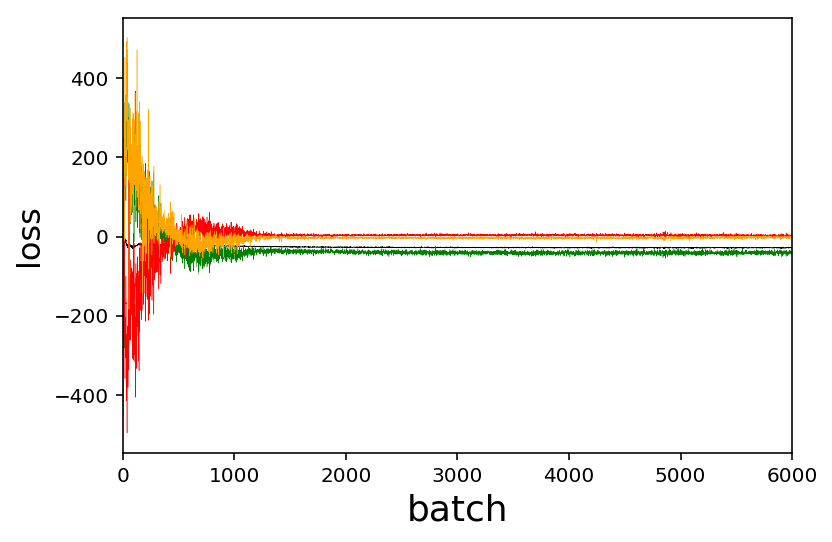

In [11]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, len(gan.d_losses))
# plt.ylim(0, 2)

plt.show()
